In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import datetime

In [2]:
def removeOut(dataframe):
    altered = pd.DataFrame() 
    for var in dataframe: 
        Q1 = dataframe[var].quantile(0.25) 
        Q3 = dataframe[var].quantile(0.75) 
        IQR = Q3 - Q1 
        altered[var] = dataframe[var][((dataframe[var] > (Q1 - 1.5 * IQR)) & (dataframe[var] < (Q3 + 1.5 * IQR)))] 
        altered = altered.dropna()
    return altered

In [3]:
def mean_sq_err(actual, predicted):
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

In [4]:
customerDf = pd.read_csv("https://raw.githubusercontent.com/dcjh/1015_Mini_Project/main/Datasets/cleaned_customer.csv") 

In [5]:
incomeDf = customerDf.loc[:, ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Dt_Customer']]

In [6]:
incomeDf['Dt_Customer'] = pd.to_datetime(incomeDf['Dt_Customer'], format='%d-%m-%Y')
incomeDf["CurrentDate"] = datetime.datetime(2021, 1, 1)
incomeDf['numMonths'] = ((incomeDf['CurrentDate'] - incomeDf['Dt_Customer'])/np.timedelta64(1, 'M'))

In [7]:
#average purchases over the months
for var in incomeDf.columns[1:7]:
    incomeDf[var] = incomeDf[var]/ incomeDf["numMonths"]

incomeDf.drop(columns = ['Dt_Customer', 'CurrentDate', "numMonths"], inplace = True)

In [8]:
incomeDf

,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,58138.0,6.355612,0.880778,5.464825,1.721520,0.880778,0.880778
1,46344.0,0.134406,0.012219,0.073312,0.024437,0.012219,0.073312
2,71613.0,4.820115,0.554426,1.436983,1.255945,0.237611,0.475223
3,26646.0,0.133018,0.048370,0.241850,0.120925,0.036278,0.060463
4,58293.0,2.073879,0.515473,1.414553,0.551436,0.323669,0.179816
...,...,...,...,...,...,...,...
2211,61223.0,7.821582,0.474370,2.007797,0.463338,1.301758,2.724867
2212,64014.0,5.155349,0.000000,0.380937,0.000000,0.000000,0.101583
2213,56981.0,10.910652,0.576775,2.607502,0.384516,0.144194,0.288387
2214,69245.0,5.140877,0.360342,2.570439,0.960912,0.360342,0.732695


In [9]:
'''
box plot*
histogram*
jointplots*
corr*
linear Regression*
k means clustering*
'''

'\nbox plot*\nhistogram*\njointplots*\ncorr*\nlinear Regression*\nk means clustering*\n'

In [10]:
incomeDf.describe()

,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,52247.251354,3.371589,0.293112,1.854671,0.418093,0.300114,0.485645
std,25173.076661,3.704251,0.445709,2.492314,0.610216,0.457772,0.573715
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35303.000000,0.272929,0.019825,0.175255,0.030580,0.012482,0.101397
50%,51381.500000,1.961983,0.089214,0.747775,0.133482,0.093616,0.270224
75%,68522.000000,5.633929,0.361836,2.565955,0.547229,0.377451,0.625974
max,666666.000000,16.713361,2.397383,19.275875,3.223610,3.308905,3.693851


/Users/darrick/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


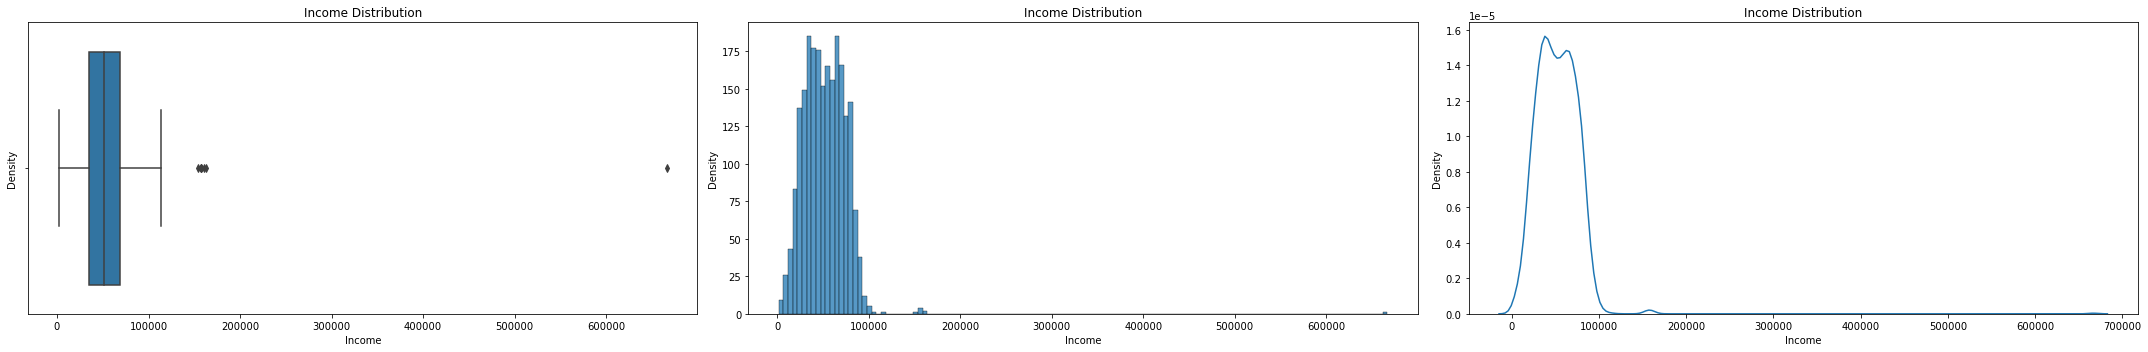

In [11]:
f, axes = plt.subplots(1, 3, figsize=(30,5))
sb.boxplot(incomeDf['Income'], ax=axes[0])
sb.histplot(incomeDf['Income'], ax=axes[1])
sb.kdeplot(incomeDf['Income'], ax=axes[2])
for i in range(3):
    axes[i].set_title('Income Distribution')
    axes[i].set_xlabel('Income')
    axes[i].set_ylabel('Density')

plt.tight_layout()
plt.show()

In [12]:
income_cleaned = removeOut(incomeDf)

/Users/darrick/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


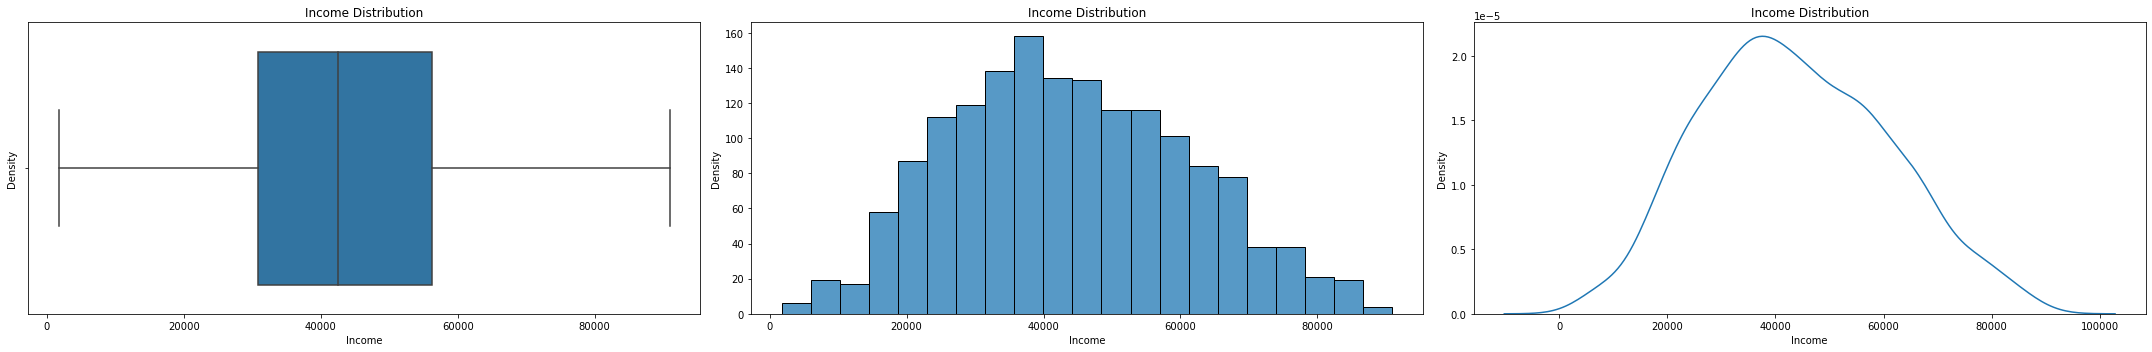

In [13]:
f, axes = plt.subplots(1, 3, figsize=(30,5))
sb.boxplot(income_cleaned['Income'], ax=axes[0])
sb.histplot(income_cleaned['Income'], ax=axes[1])
sb.kdeplot(income_cleaned['Income'], ax=axes[2])
for i in range(3):
    axes[i].set_title('Income Distribution')
    axes[i].set_xlabel('Income')
    axes[i].set_ylabel('Density')

plt.tight_layout()
plt.show()

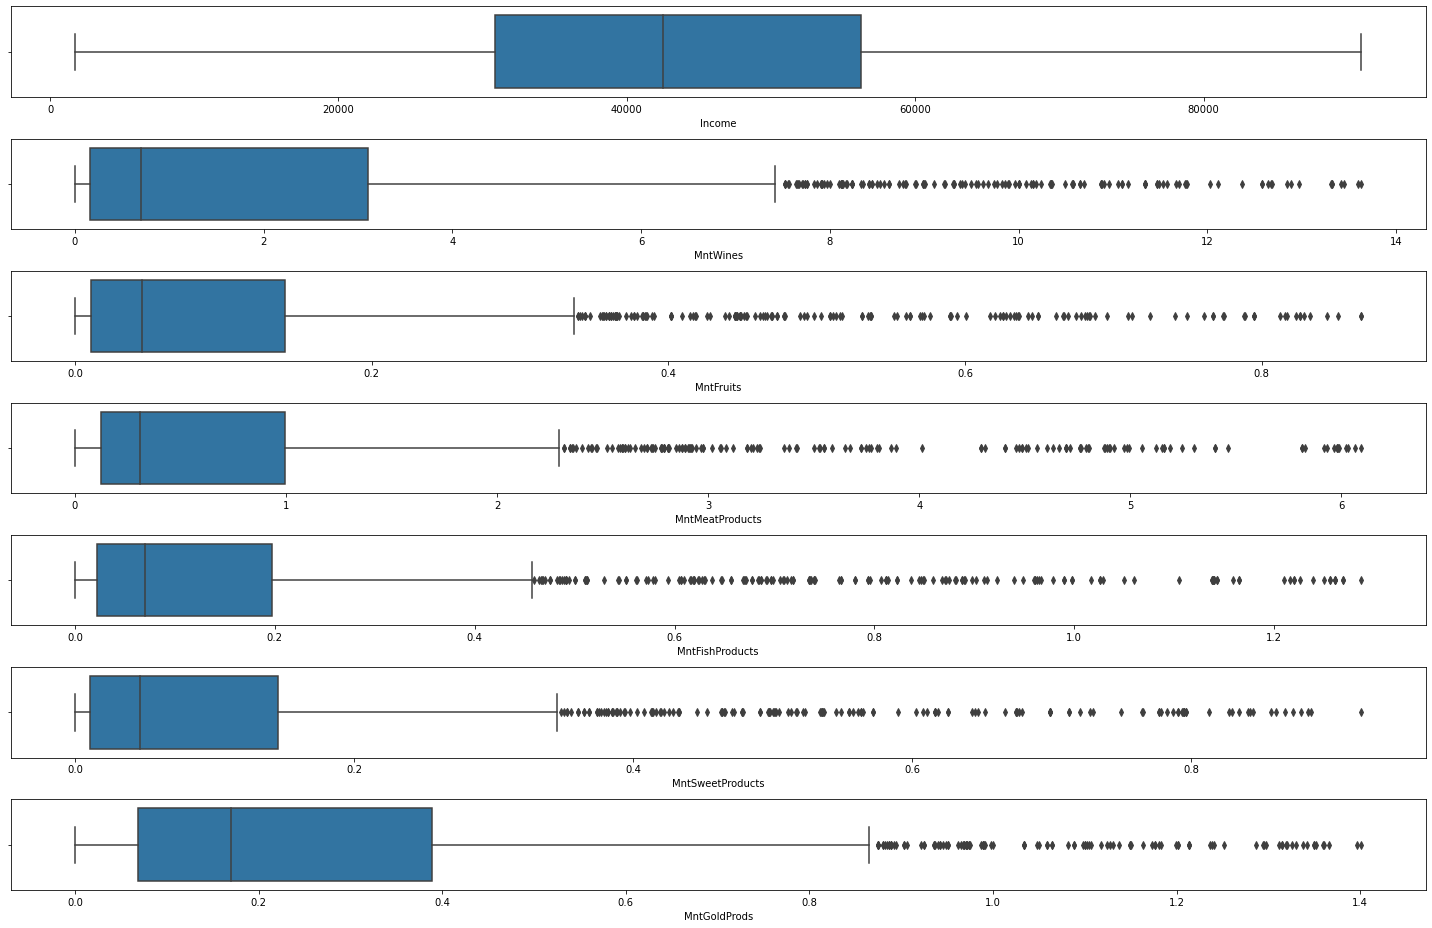

In [14]:
f, axes = plt.subplots(7, figsize=(20,13))

count=0
for var in income_cleaned:
    sb.boxplot(x = income_cleaned[var], orient = "h", ax = axes[count])
    count+=1

plt.tight_layout()
plt.show()


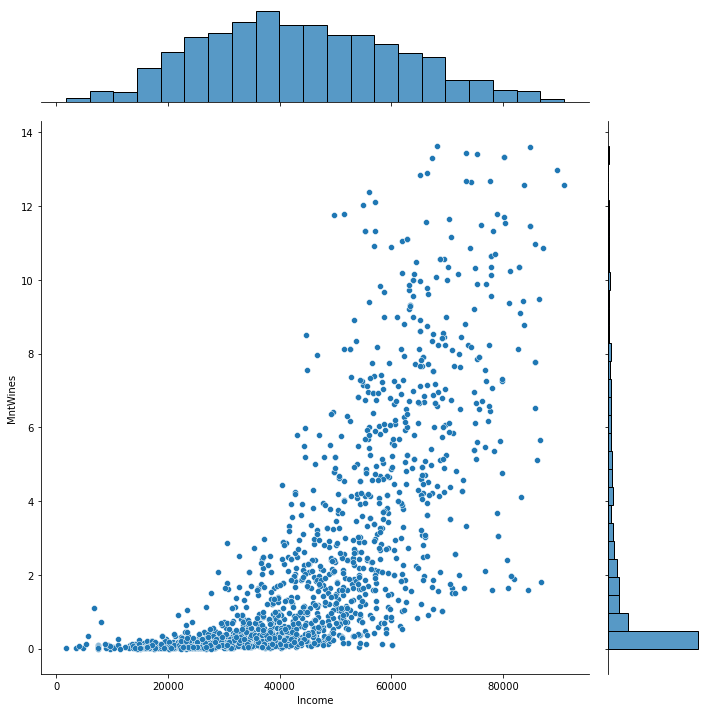

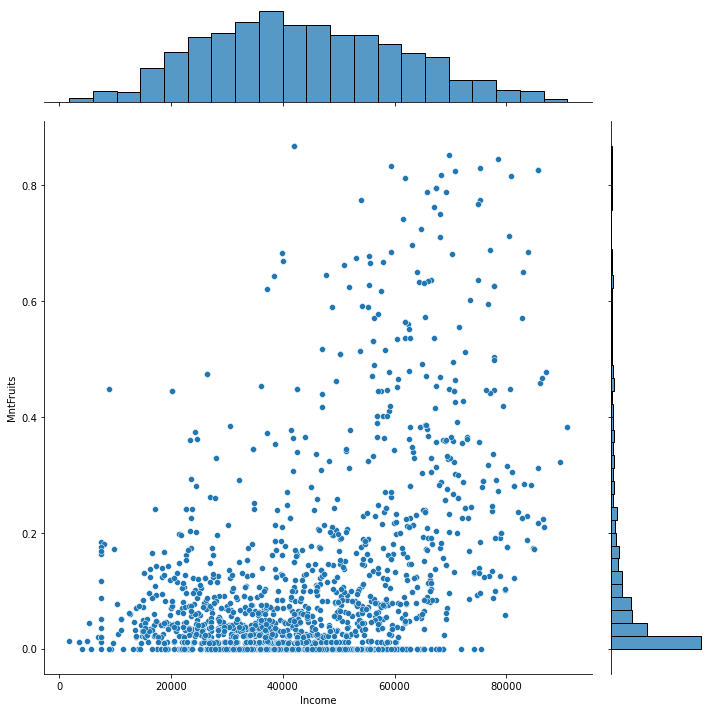

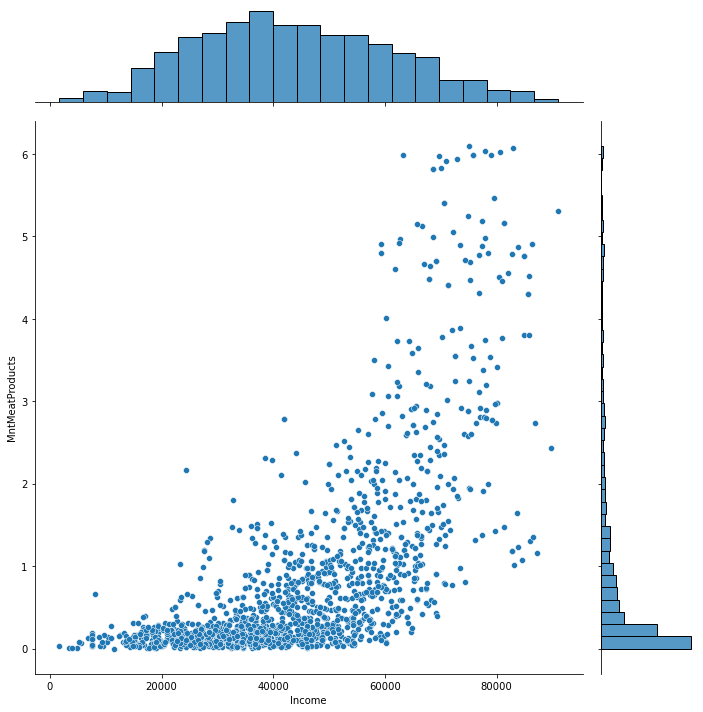

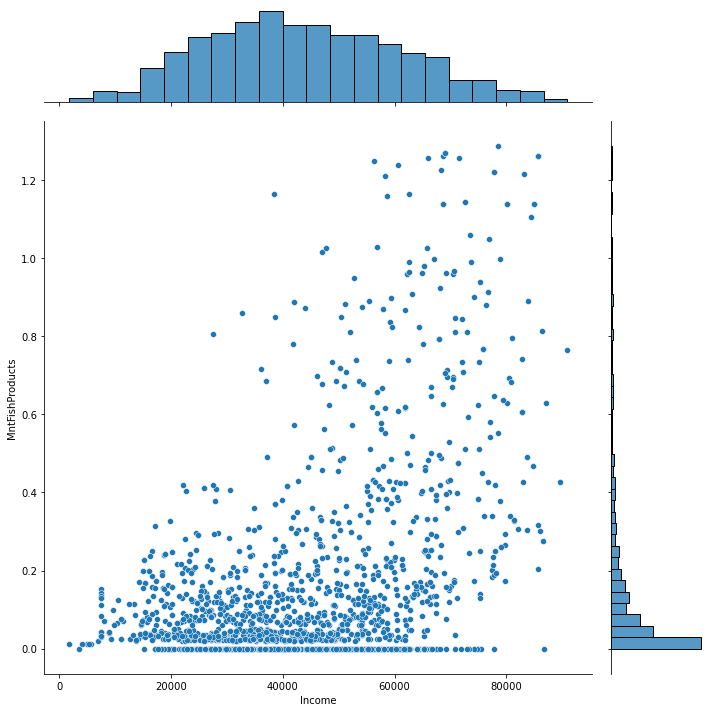

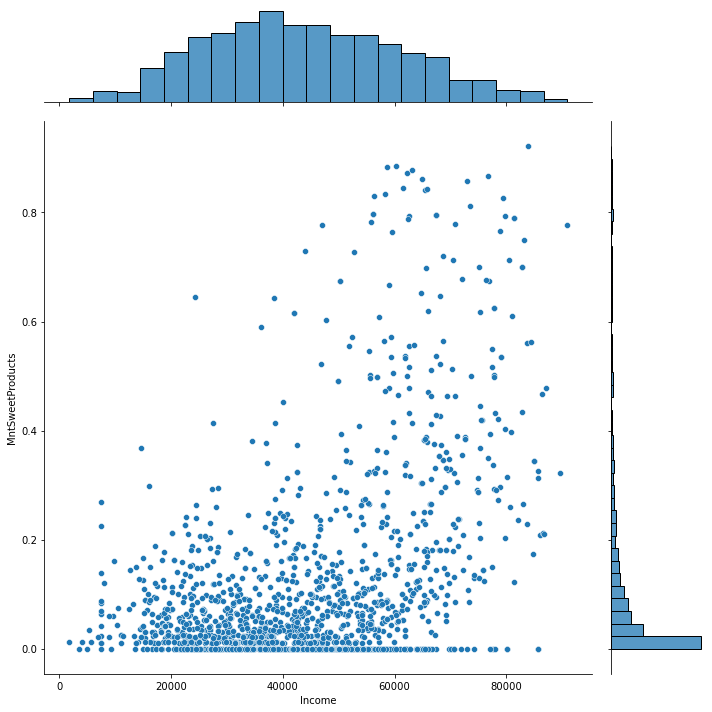

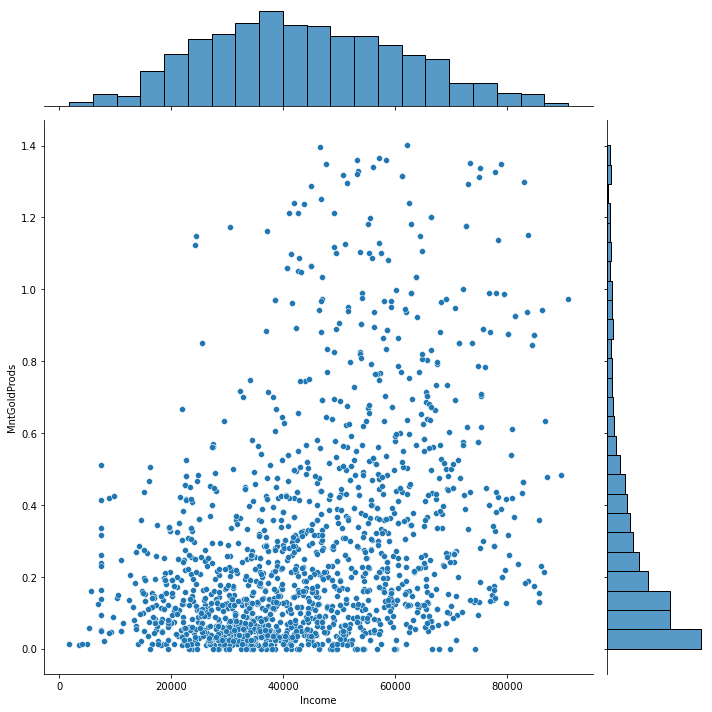

In [15]:
for var in income_cleaned.columns[1:]:
    sb.jointplot(data = income_cleaned, y = var, x = "Income", height = 10)

plt.tight_layout()
plt.show()

<AxesSubplot:>

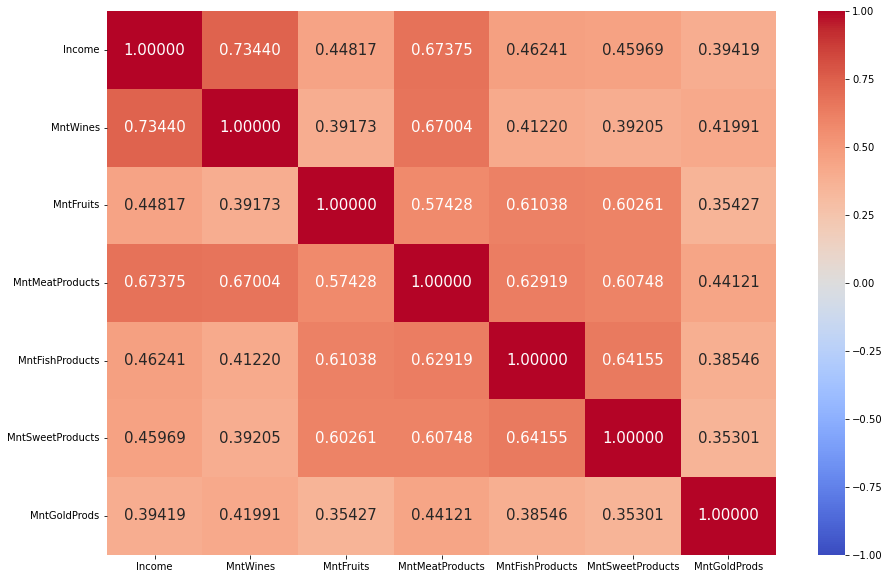

In [16]:
f = plt.figure(figsize=(15, 10))
sb.heatmap(income_cleaned.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".5f", annot_kws = {"size": 15}, cmap='coolwarm')